In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
AEdata = pd.read_csv("cleaned_AE_data.csv")

In [102]:
AEdata['Period'] = pd.to_datetime(AEdata['Period'])

In [103]:
AEdata = AEdata.set_index('Period')

In [104]:
Emergency_admissions = AEdata['Total Emergency Admissions']

## 5. Split main dataset into Train Validation and Hold subsets of data
## Train (70%, 84), Validation (20%, 24), Hold (10%, 12). Total rows 120

In [105]:
# Training dataset (70%, 84)
traindata = Emergency_admissions.iloc[0:84]

In [106]:
# Validation dataset (20%, 24)
valdata = Emergency_admissions.iloc[83:108]

In [107]:
# Hold dataset (10%, 12)
hold = Emergency_admissions[107:115]

In [108]:
## 6.Transform Series objects to dataframe objects

In [109]:
traindataf = traindata.to_frame().apply(np.int64)

In [110]:
# Renmae variable now as a dataframe
traindataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728
...,...
2017-03-01,509805
2017-04-01,471328
2017-05-01,505843


In [111]:
valdataf = valdata.to_frame().apply(np.int64)

In [112]:
valdataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019
2017-12-01,520803
2018-01-01,526045
2018-02-01,476867
2018-03-01,526066


In [113]:
holdf = hold.to_frame().apply(np.int64)

In [114]:
holdf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2019-07-01,554069
2019-08-01,529231
2019-09-01,529903
2019-10-01,563133
2019-11-01,559556
2019-12-01,560795
2020-01-01,559058
2020-02-01,510811


In [115]:
# LENGTH of renamed TRAIN dataset
len(traindataf)


84

In [116]:
len(valdataf)

25

In [117]:
len(holdf)

8

## 7. Combine Train and Validation datasets data 

In [118]:
Trainval = traindataf.append(valdataf,ignore_index=True)

## 8 Plot all three datasets Train, Validation and hold datasets 

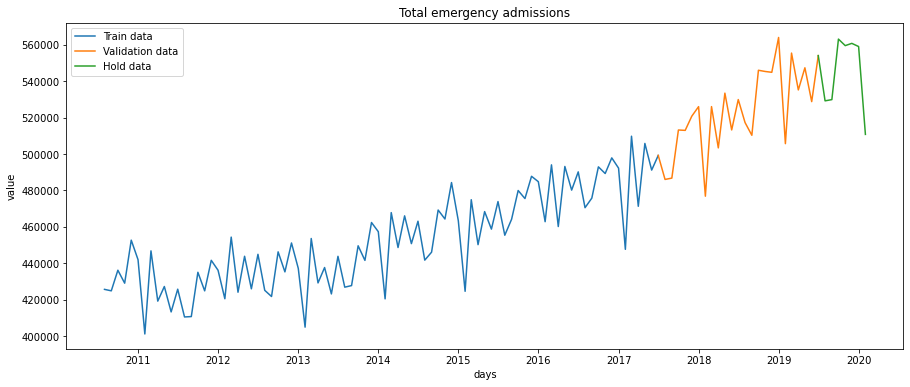

In [119]:
plt.figure(figsize=(15,6))
plt.title('Total emergency admissions')
plt.plot(traindataf, label = "Train data")
plt.plot(valdataf, label = "Validation data")
plt.plot(holdf, label = "Hold data")
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

# 9. Exponential smoothing
#### Make sure the index of the dataframe is a datetime object in python.

In [120]:
AEdata.index

DatetimeIndex(['2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Period', length=120, freq=None)

In [121]:
# Import module for Exponential smoothing 
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## 9.1 Create an Exponential smoothing model


In [122]:
model = ExponentialSmoothing((traindataf['Total Emergency Admissions'])
                            ,trend='add',seasonal='mul')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [123]:
model

## 9.2 Fit model

In [124]:
# USe default
# those will be HYPERPARAMETERS
#fit1 = model.fit(smoothing_level=.1, smoothing_slope=.01)
fit1 = model.fit()

#### Train data ends in datapoint 84, so we need to predict form there 

In [125]:
# Let's predict 30 days in advance
# traindaf (64 datapoints)
pred1 = fit1.predict(start=85, end=125)

# (start)

### Use valdata to predict values (match length Train and Validation dataset)

In [126]:
pred2 = fit1.predict(start=valdataf.index[0],
                     end=valdataf.index[-1])

In [127]:
print(pred2)

2017-07-01    503000.396383
2017-08-01    481752.019043
2017-09-01    484416.379645
2017-10-01    506218.442096
2017-11-01    498695.007855
2017-12-01    517225.638804
2018-01-01    507141.696403
2018-02-01    470654.442565
2018-03-01    521209.398209
2018-04-01    489785.480687
2018-05-01    512273.069889
2018-06-01    496806.952041
2018-07-01    512063.948097
2018-08-01    492181.818322
2018-09-01    494884.974751
2018-10-01    517138.529916
2018-11-01    509433.496866
2018-12-01    528343.201508
2019-01-01    518023.017898
2019-02-01    480734.863180
2019-03-01    532352.709981
2019-04-01    500238.334594
2019-05-01    523186.437987
2019-06-01    507372.076455
2019-07-01    522934.264579
Freq: MS, dtype: float64


In [128]:
type(pred2)

pandas.core.series.Series

In [129]:
type(valdataf)

pandas.core.frame.DataFrame

In [130]:
type(traindataf)

pandas.core.frame.DataFrame

### Use .squeeze() to turn dataframes into a Series prior to produce the plot

In [131]:
traindatas = traindataf.squeeze()
    

In [132]:
valdatas = valdataf.squeeze() 

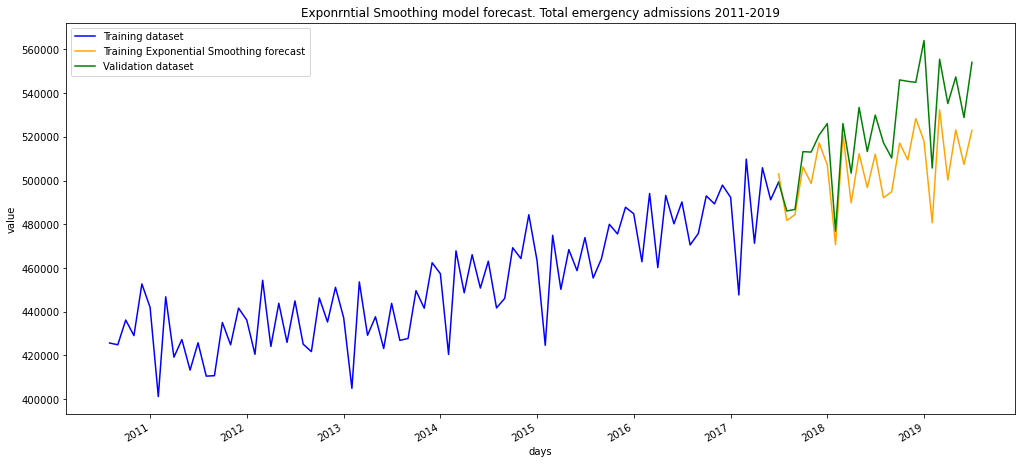

In [210]:
# plt.plot(forecast, c='green',label="Training Forecast")
plt.figure(figsize=(17,8))
plt.title('Exponrntial Smoothing model forecast. Total emergency admissions 2011-2019')
plt.plot(traindataf, c='blue',label = "Training dataset")
pred2.plot( c='orange',label="Training Exponential Smoothing forecast")
plt.plot(valdataf, c='green',label="Validation dataset")
plt.ylabel("value")
plt.xlabel("days")
plt.legend()
plt.show()

## 9.3 Plot the model with relevant values 

In [135]:
forecast_rename = pred2.rename('Forecast') 

In [197]:
forecast_rename.head()

2017-07-01    503000.396383
2017-08-01    481752.019043
2017-09-01    484416.379645
2017-10-01    506218.442096
2017-11-01    498695.007855
Freq: MS, Name: Forecast, dtype: float64

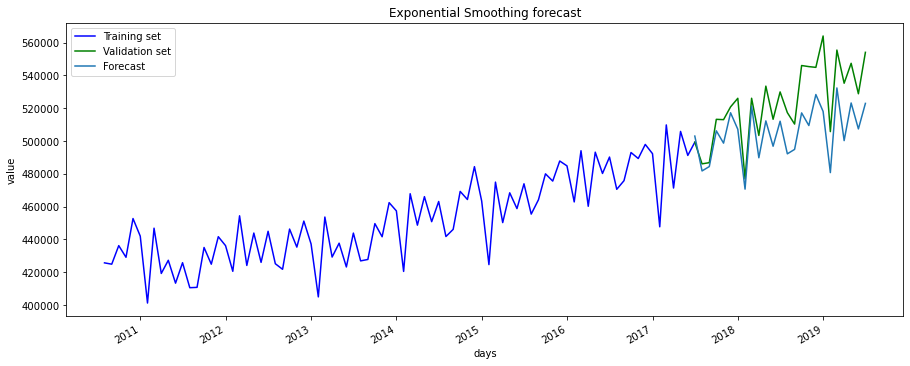

In [136]:
plt.figure(figsize=(15,6))
plt.plot(traindataf, c='blue',label = "Training set")
plt.plot(valdataf, c='green',label="Validation set")
forecast_rename.plot()
plt.title('Exponential Smoothing forecast')
plt.ylabel("value")
plt.xlabel("days")
plt.legend()
plt.show()

### 5. Compute MAPE value

In [165]:
 # Proir to compute the MAPE value, you need to turn the objects used in its formula into a Pandas object 
# traindataf
# forecast_rename

In [194]:
type(valdataf)

pandas.core.frame.DataFrame

In [195]:
type(forecast_rename)

pandas.core.series.Series

In [180]:
### 5.1 Rename from ValdataNEW  datarame  as Value

In [182]:
ValdataNEW = valdataf.rename(columns={'Total Emergency Admissions':'Value'})

In [183]:
type(ValdataNEW)

pandas.core.frame.DataFrame

In [196]:
ValdataNEW.head()

,Value
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019


In [184]:
### 5.2 Convert Forecast output into a Dataframe and rename column as "Value"

In [185]:
ForecastNEW = pd.DataFrame(forecast_rename)

In [186]:
type(ForecastNEW)

pandas.core.frame.DataFrame

In [187]:
ForecastNEW.head()

,Forecast
2017-07-01,503000.396383
2017-08-01,481752.019043
2017-09-01,484416.379645
2017-10-01,506218.442096
2017-11-01,498695.007855


In [188]:
ForecastNEW2 = ForecastNEW.rename(columns={'Forecast':'Value'})

In [198]:
ForecastNEW2.head()

,Value
2017-07-01,503000.396383
2017-08-01,481752.019043
2017-09-01,484416.379645
2017-10-01,506218.442096
2017-11-01,498695.007855


In [199]:
### 5.3 Build the MAPE function based on Dataframes

In [204]:
def accuray_MAPE(ACT,FCAST):
  #  Value = abs((ACT-FCAST)/ACT).sum()/len(ACT)
    Value_percent = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    Mape_value = print(f"EXPONENTIAL SMOOTHING model MAPE value in percent   {Value_percent}")
    #Mape_value_per = print(f"Seasonal ARIMA model MAPE {Value}")
    return Mape_value

In [205]:
accuray_MAPE(ValdataNEW,ForecastNEW2)

EXPONENTIAL SMOOTHING model MAPE value in percent   Value    3.468955
dtype: float64
